# Efficiency

Electron neutrino selection efficiency as a function of neutrino energy, lepton $\theta$ and lepton $\phi$, and neutrino $(x,y,z)$ coordinates.

In [10]:
import ROOT
ROOT.gROOT.ProcessLine("gErrorIgnoreLevel = 2002;")
ROOT.gStyle.SetPalette(ROOT.kLake)
import efficiency as e

In [11]:
import importlib    # This command makes sure we load the last version of the module
importlib.reload(e) # No need to restart the kernel after modifications

<module 'efficiency' from '/Users/soleti/uboone/nue_selection_plots/efficiency.py'>

In [12]:
p_preliminary = ROOT.TPaveText(0.078, 0.91, 0.7, 0.978, "NDC")
p_preliminary.SetFillStyle(0)
p_preliminary.SetBorderSize(0)
pot = 4.341e19
p_preliminary.AddText("MicroBooNE Simulation Preliminary - 4.34e19 POT")

colors = {
    "passed": "#eeeeee",
    "quality cuts": "#E43006",
    "CC #nu_{#mu} selected": "#E85B05",
    "not contained": "#EC8705",
    "cosmic selected": "#F0B504",
    "1 shower": "#F4E503",
    "no showers": '#D8F802',
    "no flash": "#ADFC02",
    "no data products": "#80FE02",
    "cuts": "#ffffff"
}

In [13]:
scaling_factor = 1
eff = e.efficiency(
    "data_files/mc_nue_sbnfit", ["energy", "theta", "phi", "vx", "vy", "vz"],
    systematics=True,
    scale=scaling_factor)

In [14]:
eff_ene = eff["energy"]
eff_theta = eff["theta"]
eff_phi = eff["phi"]
eff_x = eff["vx"]
eff_y = eff["vy"]
eff_z = eff["vz"]

15.379928213589487


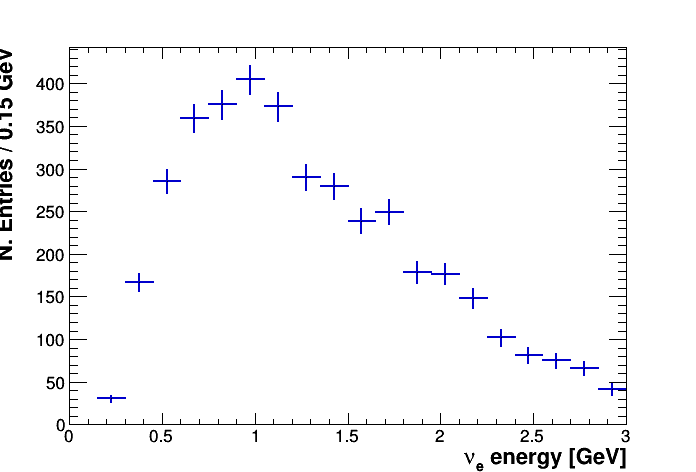

In [48]:
c_cuts = ROOT.TCanvas("c_cuts")
eff_ene.selected["passed"].Draw()
print(eff_ene.selected["passed"].Integral()*4.341e19/eff_ene.pot*1.04)
c_cuts.Draw()

## True distributions
Distributions of the true variable for 6.6e20 POT

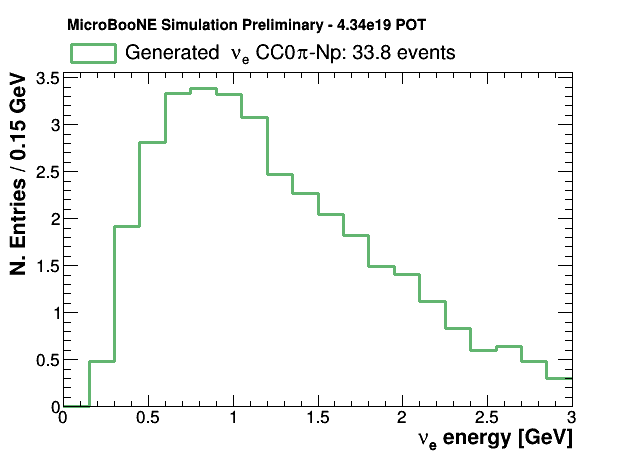

In [49]:
ene_tot = eff_ene.tot.Clone()
ene_tot.Scale(4.341e19/eff_ene.pot*1.04)
c_ene_tot, ene_tot, leg_ene = e.draw_true(ene_tot)
c_ene_tot.Draw()
p_preliminary.Draw()
leg_ene.Draw()
c_ene_tot.SaveAs("plots/tot.pdf")

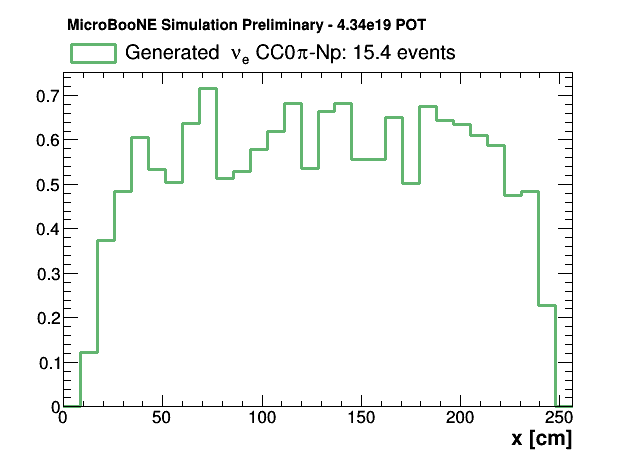

In [50]:
vx_tot = eff_x.selected["passed"].Clone()
vx_tot.Scale(4.341e19/eff_x.pot)
c_vx_tot, vx_tot, leg_vx = e.draw_true(vx_tot)
c_vx_tot.Draw()
p_preliminary.Draw()
leg_vx.Draw()

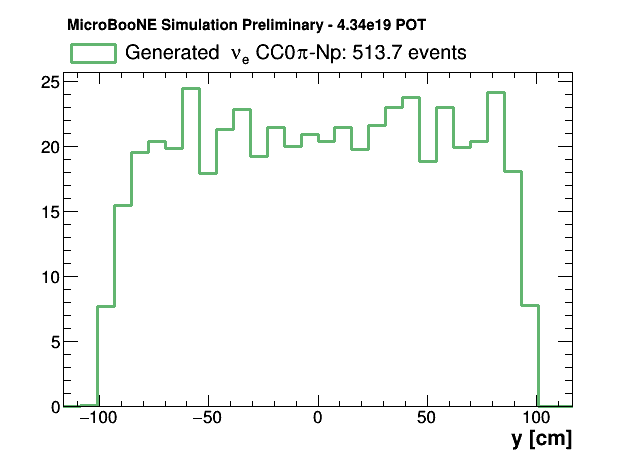

In [51]:
vy_tot = eff_y.tot.Clone()
vy_tot.Scale(6.6e20/eff_y.pot)
c_vy_tot, vy_tot, leg_vy = e.draw_true(vy_tot)
c_vy_tot.Draw()
p_preliminary.Draw()
leg_vy.Draw()

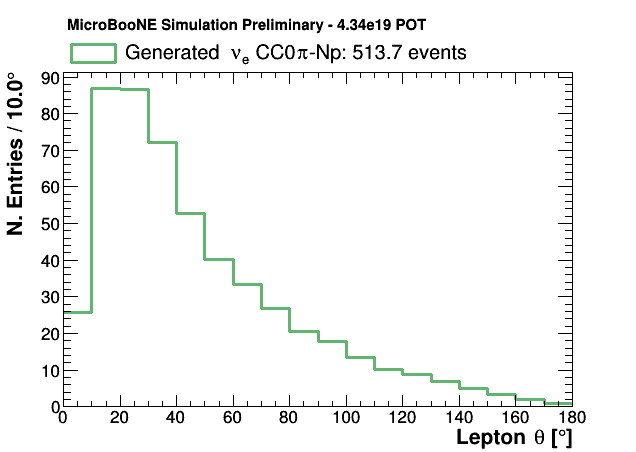

In [52]:
theta_tot = eff_theta.tot.Clone()
theta_tot.Scale(6.6e20/eff_theta.pot)
c_theta_tot, theta_tot, leg_theta = e.draw_true(theta_tot)
c_theta_tot.Draw()
p_preliminary.Draw()
leg_theta.Draw()

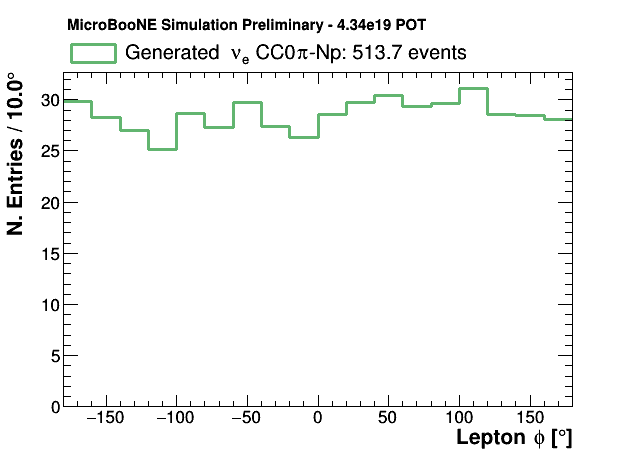

In [53]:
phi_tot = eff_phi.tot.Clone()
phi_tot.Scale(6.6e20/eff_phi.pot)
c_phi_tot, phi_tot, leg_phi = e.draw_true(phi_tot)
c_phi_tot.Draw()
phi_tot.SetMinimum(0)
p_preliminary.Draw()
leg_phi.Draw()
c_phi_tot.SaveAs("phi_tot.pdf")

## Inefficiency

Inefficiency reasons:
- No data products: the event does not have any reconstructed data product 
- No flash: no valid flash in the event
- No showers: the neutrino candidate does not have any shower in the complete Pandora hierarchy
- 1 shower: the neutrino candidate has only one shower reconstructed and no other object
- Cosmic selected: we select a cosmic ray and not the neutrino interaction
- Not contained: one of the tracks is not fully contained or one of the shower starting point is not fully contained
- CC $\nu_{\mu}$ selected: the event is selected by the CC $\nu_{\mu}$-inclusive filter
- Quality cuts: the event does not satisfy the quality cuts (5 track hits, 5 shower hits, one hit in every plane)

In [54]:
h_ene_stack = ROOT.THStack("h_stack", ";#nu_{e} energy [GeV];Fraction")
h_ene_cats, leg = e.stacked(eff_ene, h_ene_stack, colors)

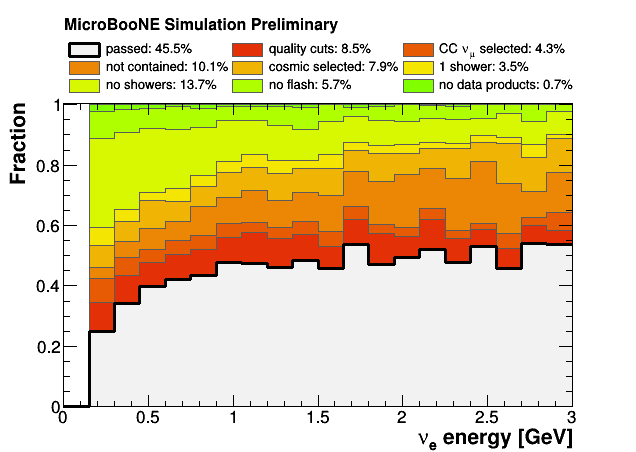

In [55]:
c_eff_ene = ROOT.TCanvas("c_eff_ene", "Energy", 640, 480)
h_ene_stack.SetMaximum(0.955)
h_ene_stack.Draw("hist")
h_ene_stack.GetYaxis().SetTitleOffset(0.9)
leg.SetNColumns(3)
leg.Draw()
p_preliminary.Clear()
p_preliminary.AddText("MicroBooNE Simulation Preliminary             ")
p_preliminary.Draw()
c_eff_ene.SetTopMargin(0.23)
c_eff_ene.Draw()
c_eff_ene.SaveAs("plots/ineff_ene.pdf")

In [56]:
h_theta_stack = ROOT.THStack("h_stack", ";Lepton #theta [#circ];Fraction")
h_theta_cats, leg = e.stacked(eff_theta, h_theta_stack, colors)

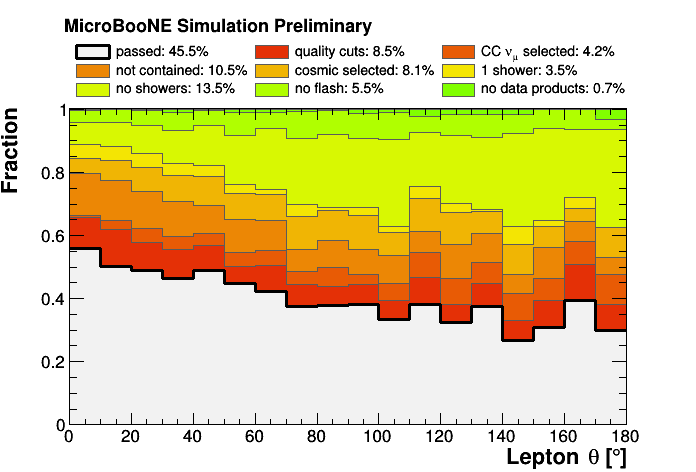

In [57]:
c_eff_theta = ROOT.TCanvas("c_eff_theta")
h_theta_stack.SetMaximum(0.955)
h_theta_stack.Draw("hist")
leg.Draw()
leg.SetNColumns(3)
p_preliminary.Draw()
c_eff_theta.SetTopMargin(0.23)
c_eff_theta.Draw()
c_eff_theta.SaveAs("plots/ineff_theta.pdf")

In [58]:
h_phi_stack = ROOT.THStack("h_stack_phi", ";Lepton #phi [#circ];Fraction")
h_phi_cats, leg = e.stacked(eff_phi, h_phi_stack, colors)

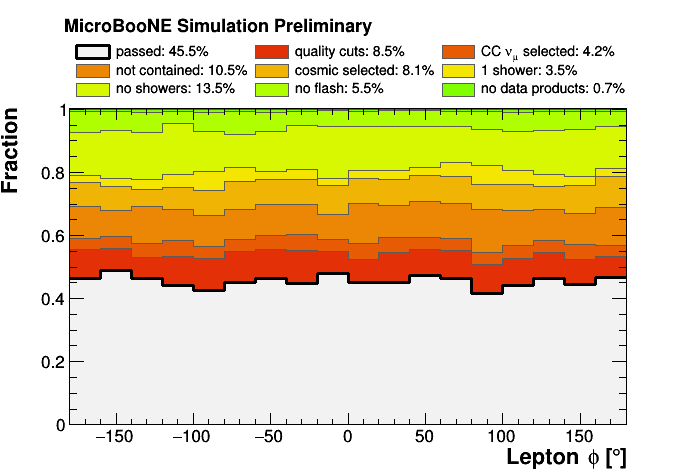

In [59]:
c_eff_phi = ROOT.TCanvas("c_eff_phi")
h_phi_stack.SetMaximum(0.955)
h_phi_stack.Draw("hist")
leg.Draw()
leg.SetNColumns(3)
p_preliminary.Draw()
c_eff_phi.SetTopMargin(0.23)
c_eff_phi.Draw()
c_eff_phi.SaveAs("plots/ineff_phi.pdf")

In [60]:
h_x_stack = ROOT.THStack("h_stack_x", ";x [cm];Fraction")
h_x_cats, leg = e.stacked(eff_x, h_x_stack, colors)

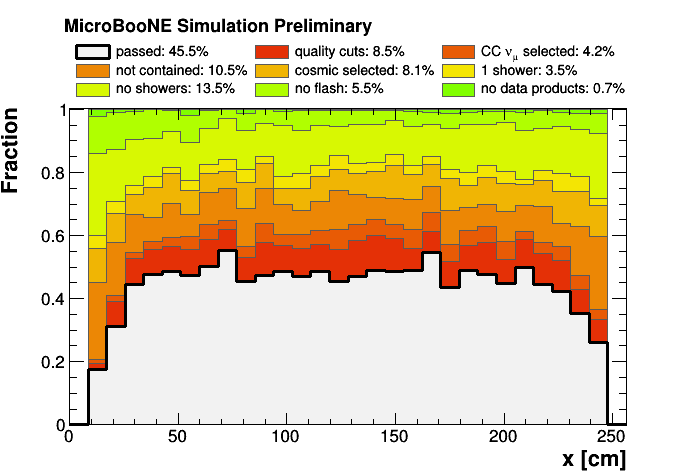

In [61]:
c_eff_x = ROOT.TCanvas("c_eff_x")
h_x_stack.SetMaximum(0.955)
h_x_stack.Draw("hist")
leg.Draw()
leg.SetNColumns(3)
p_preliminary.Draw()
c_eff_x.SetTopMargin(0.23)
c_eff_x.Draw()
c_eff_x.SaveAs("plots/ineff_x.pdf")

In [62]:
h_y_stack = ROOT.THStack("h_stack_y", ";y [cm];Fraction")
h_y_cats, leg = e.stacked(eff_y, h_y_stack, colors)

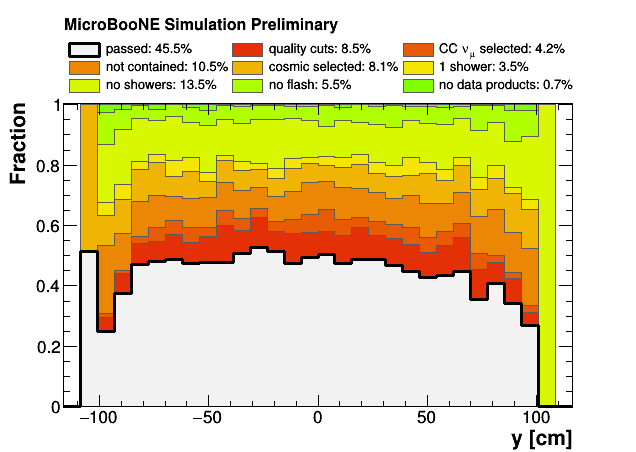

In [63]:
c_eff_y = ROOT.TCanvas("c_eff_y", "Efficiency y", 640, 480)
h_y_stack.SetMaximum(0.955)
h_y_stack.Draw("hist")
h_y_stack.GetYaxis().SetTitleOffset(0.9)
leg.Draw()
leg.SetNColumns(3)
p_preliminary.Draw()
c_eff_y.SetTopMargin(0.23)
c_eff_y.Draw()
c_eff_y.SaveAs("plots/ineff_y.pdf")

In [64]:
h_z_stack = ROOT.THStack("h_stack_z", ";z [cm];Fraction")
h_z_cats, leg = e.stacked(eff_z, h_z_stack, colors)

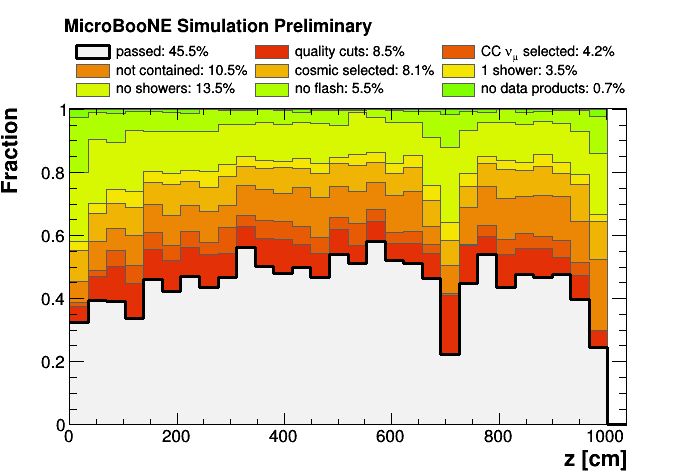

In [65]:
c_eff_z = ROOT.TCanvas("c_eff_z")
h_z_stack.SetMaximum(0.955)
h_z_stack.Draw("hist")
leg.Draw()
leg.SetNColumns(3)
p_preliminary.Draw()
c_eff_z.SetTopMargin(0.23)
c_eff_z.Draw()
c_eff_z.SaveAs("plots/ineff_z.pdf")

## Selection efficiency with systematic uncertainties

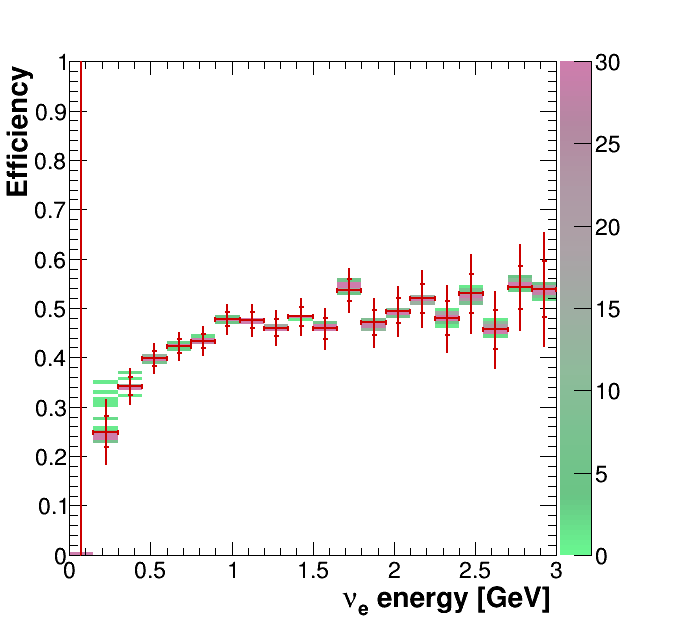

In [19]:
# c_cuts, eff_cuts_stat, eff_cuts_sys, eff_cuts_2d, l_cuts = eff_ene.draw(systematics=False, uni=False, mode="cuts")
ROOT.gStyle.SetPalette(ROOT.kMint)
c_eff_ene_sys, eff_ene_stat, eff_ene_sys, eff_ene_2d, l_ene_eff = eff_ene.draw(systematics=True, uni=True, mode="passed")
# p_preliminary.Draw()
# c_eff_ene_sys.Draw()
# eff_ene_2d.SetMaximum(30)
# eff_ene_2d.GetYaxis().SetTitleOffset(0.9)
# # c_eff_ene_sys.SetTopMargin(0.2)
# c_eff_ene_sys.SetRightMargin(0.2)
# eff_ene_stat.GetPaintedGraph().GetYaxis().SetTitleOffset(0.9)
# eff_ene_stat.GetPaintedGraph().GetXaxis().SetLimits(0, 3)
# eff_ene_stat.GetPaintedGraph().SetMaximum(1)
# eff_ene_stat.GetPaintedGraph().SetMinimum(0.01)
# l_ene_eff.Draw()
# l_ene_eff.AddEntry(eff_ene_stat, "Rectangular cuts efficiency: (%.1f #pm %.1f (stat.)) %%"
#                    % (eff_ene.efficiency["selet"]*100, eff_ene.efficiency_err["cuts"]*100),
#                   "le")
# eff_cuts_stat.Draw("same")
# eff_cuts_sys.Draw("same")
# eff_cuts_sys.SetLineColor(ROOT.kBlue+1)
# eff_cuts_stat.SetLineColor(ROOT.kBlue+1)
c_eff_ene_sys.Draw()
# c_eff_ene_sys.SetLogy()
c_eff_ene_sys.SaveAs("plots/eff_ene_flux.pdf")


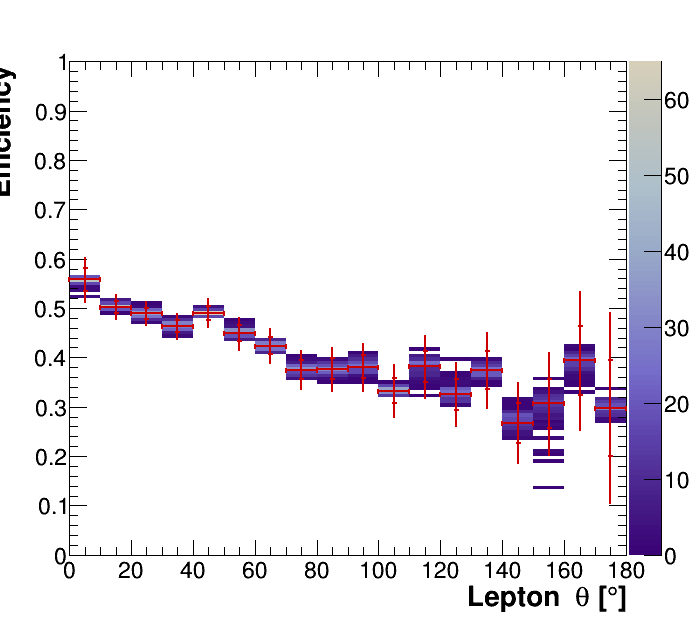

In [22]:
c_eff_theta_sys, eff_theta_stat, eff_theta_sys, eff_theta_2d, l_theta_eff = eff_theta.draw()
c_eff_theta_sys.Draw()
eff_theta_stat.GetPaintedGraph().GetXaxis().SetLimits(0, 180)
eff_theta_stat.GetPaintedGraph().SetMaximum(1)
eff_theta_stat.GetPaintedGraph().SetMinimum(0)
c_eff_theta_sys.SaveAs("plots/eff_theta.pdf")

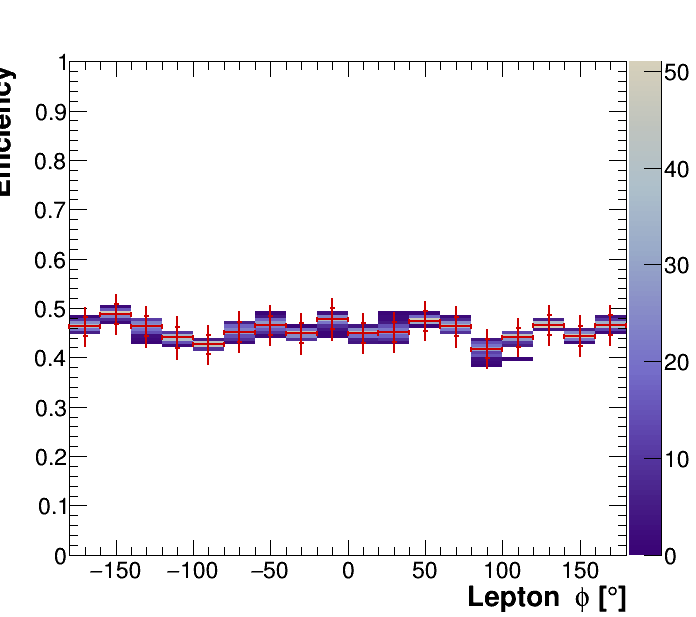

In [70]:
c_eff_phi_sys, eff_phi_stat, eff_phi_sys, eff_phi_2d, l_phi_eff = eff_phi.draw()
c_eff_phi_sys.Draw()
eff_phi_stat.GetPaintedGraph().GetXaxis().SetLimits(-180, 180)
eff_phi_stat.GetPaintedGraph().SetMaximum(1)
eff_phi_stat.GetPaintedGraph().SetMinimum(0)
c_eff_phi_sys.SaveAs("plots/eff_phi.pdf")

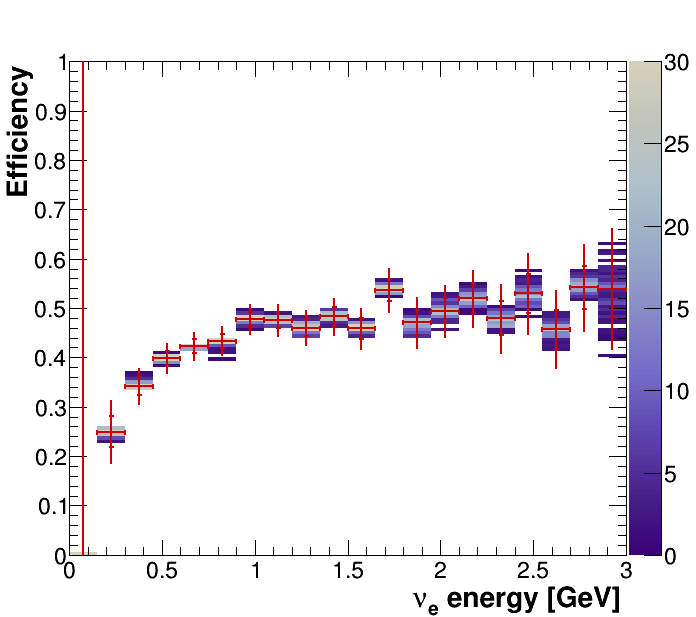

In [72]:
c_eff_phi_sys, eff_phi_stat, eff_phi_sys, eff_phi_2d, l_phi_eff = eff_ene.draw()
c_eff_phi_sys.Draw()
# eff_phi_stat.GetPaintedGraph().GetXaxis().SetLimits(-180, 180)
eff_phi_stat.GetPaintedGraph().SetMaximum(1)
eff_phi_stat.GetPaintedGraph().SetMinimum(0)
c_eff_phi_sys.SaveAs("plots/eff_phi.pdf")

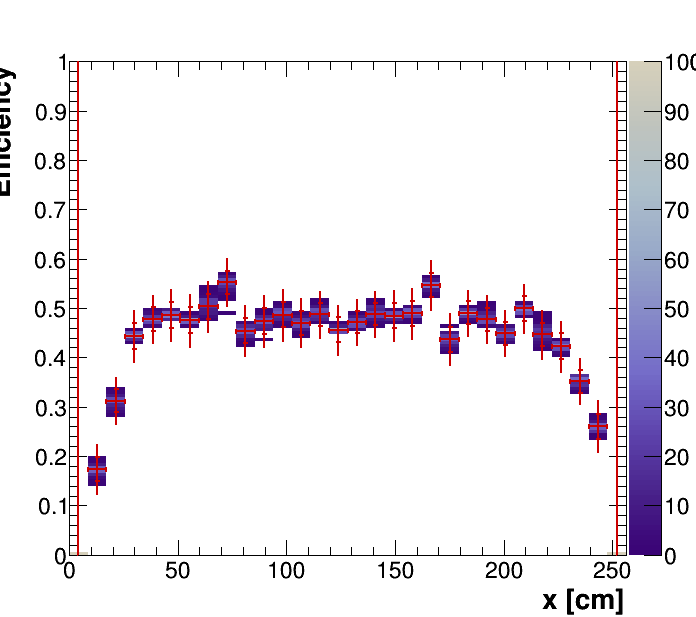

In [71]:
c_eff_x_sys, eff_x_stat, eff_x_sys, eff_x_2d, l_x_eff = eff_x.draw()
c_eff_x_sys.Draw()
eff_x_stat.GetPaintedGraph().SetMaximum(1)
eff_x_stat.GetPaintedGraph().SetMinimum(0)
c_eff_x_sys.SaveAs("plots/eff_x.pdf")